In [1]:
#Basic libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Student_Performance.csv")
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
# Cheking outlier

dataset.isnull().sum()/len(dataset)*100

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [7]:
dataset.duplicated().sum()

127

In [8]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

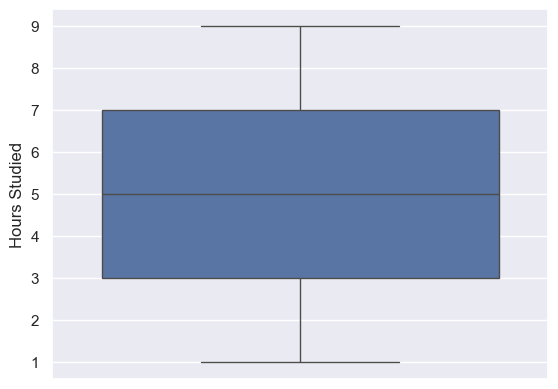

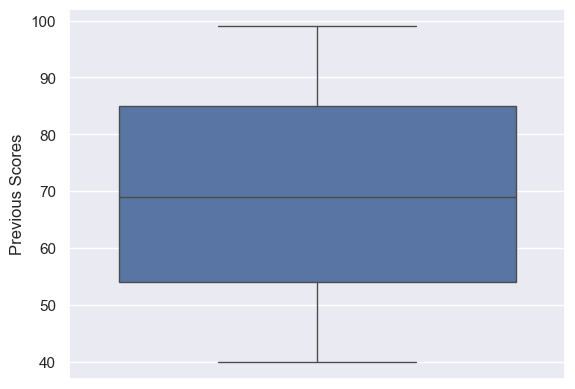

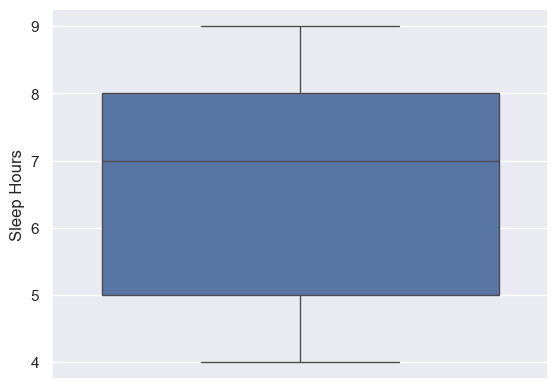

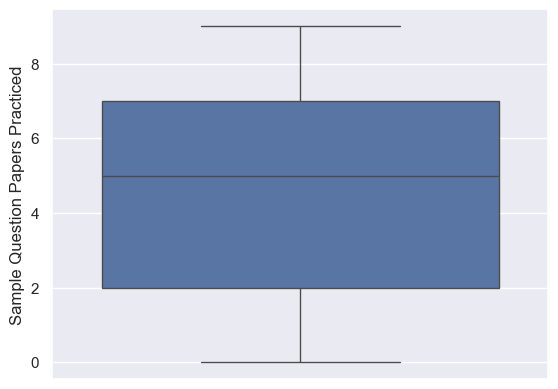

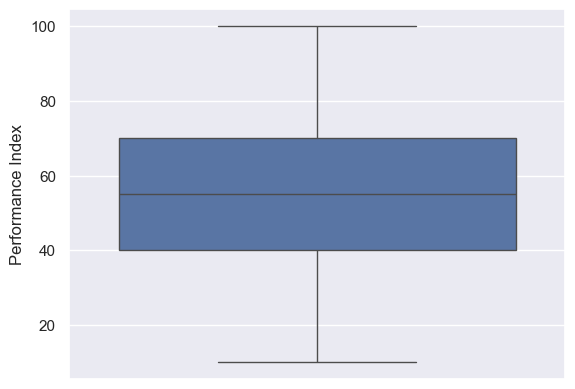

In [9]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for i in list(dataset.select_dtypes(exclude =['object']).columns)[0:]:
    boxplots(i)

#### Encoding the cat. variable

In [10]:
dataset['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [11]:
dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].astype('category')
dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].cat.codes

In [12]:
dataset['Extracurricular Activities'].value_counts()

Extracurricular Activities
0    4986
1    4887
Name: count, dtype: int64

In [13]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### Finding correlation

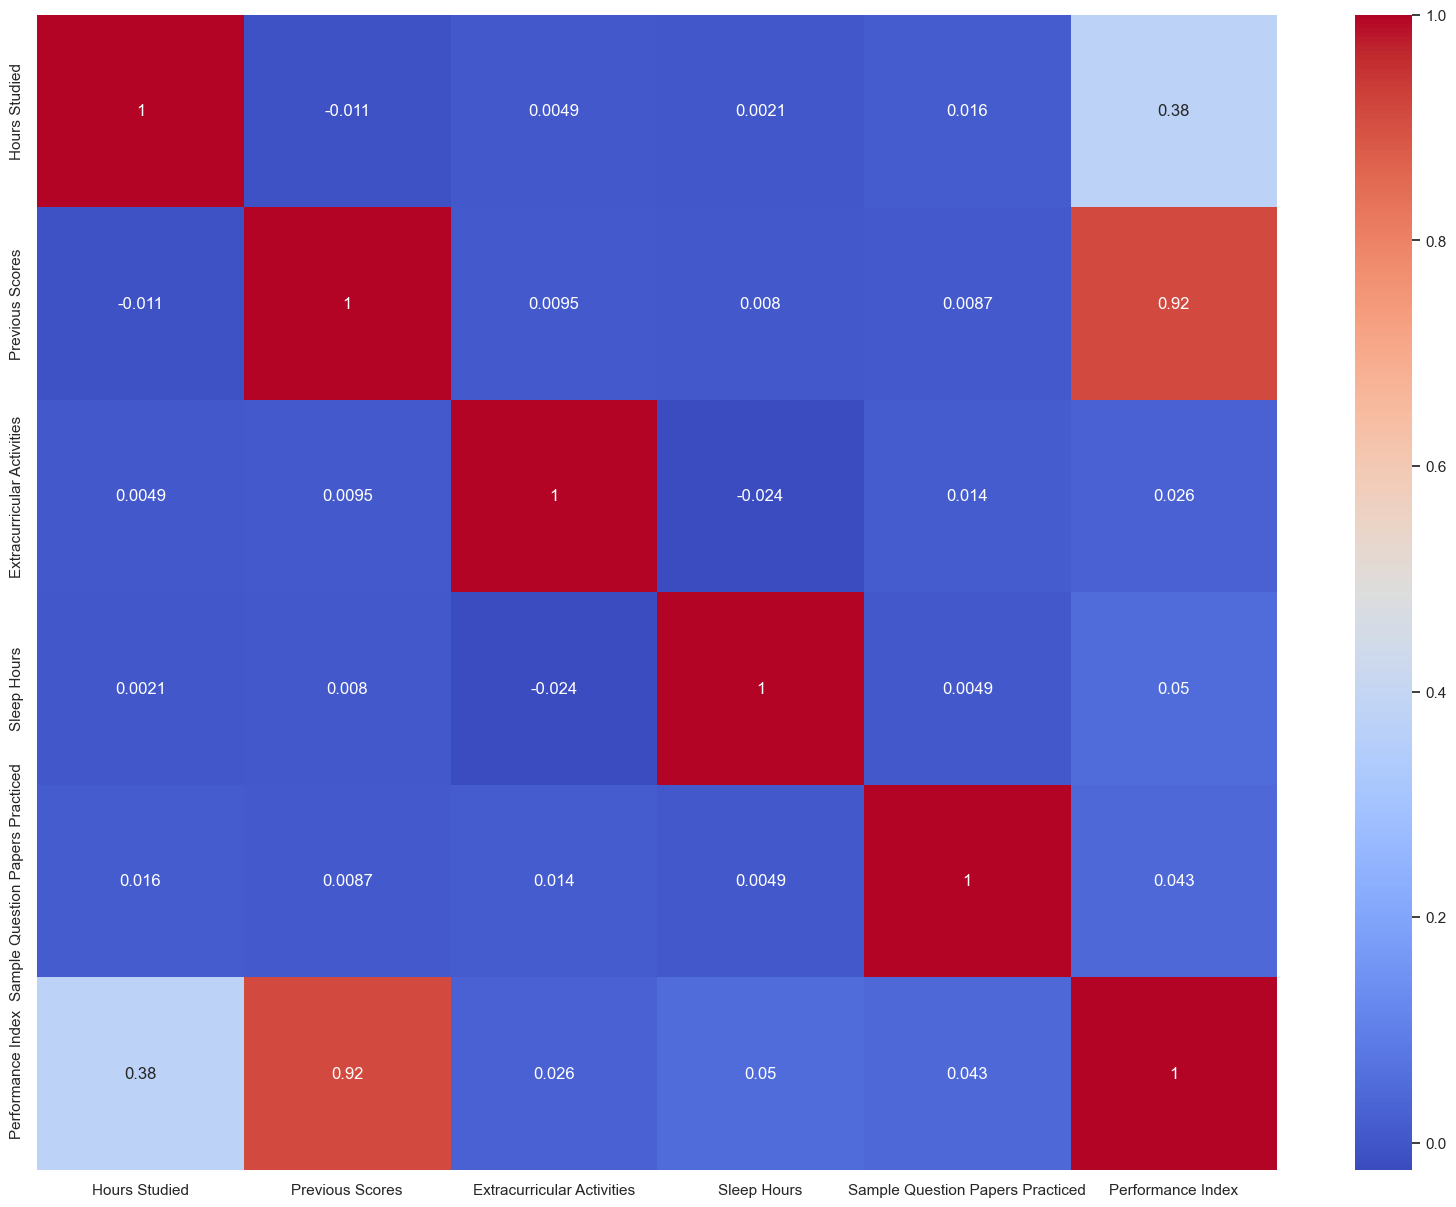

In [14]:
plt.figure(figsize=(20,15))
#corr = dataset.corr()
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

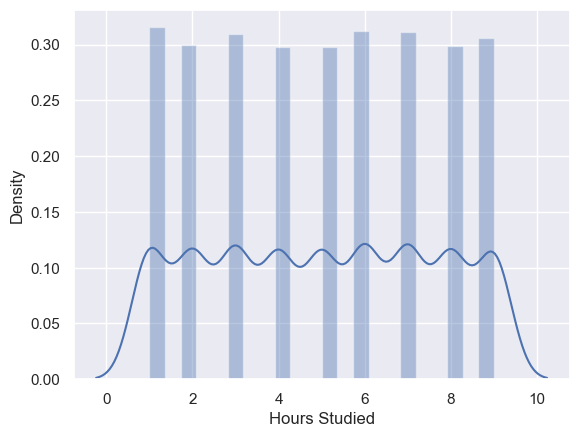

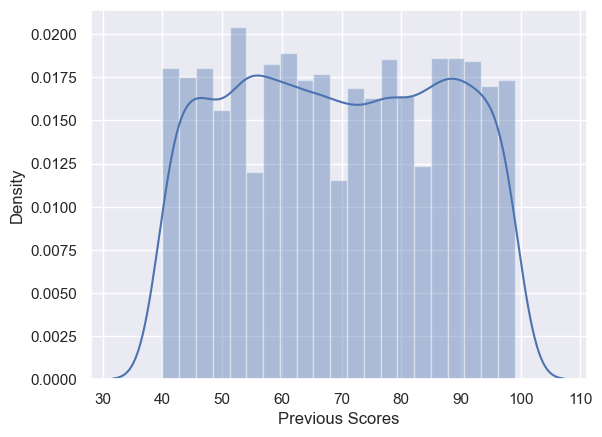

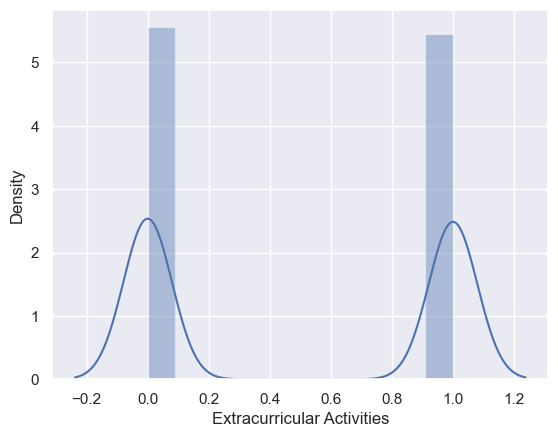

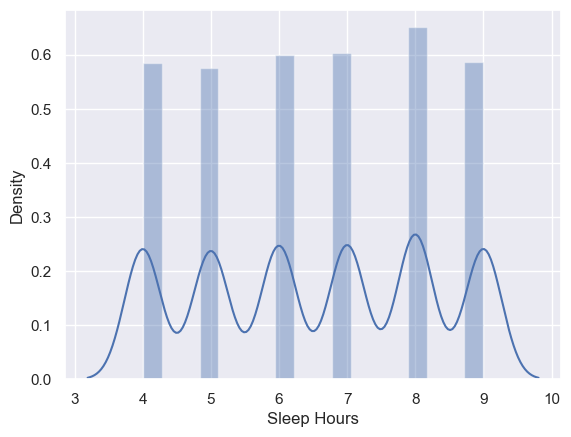

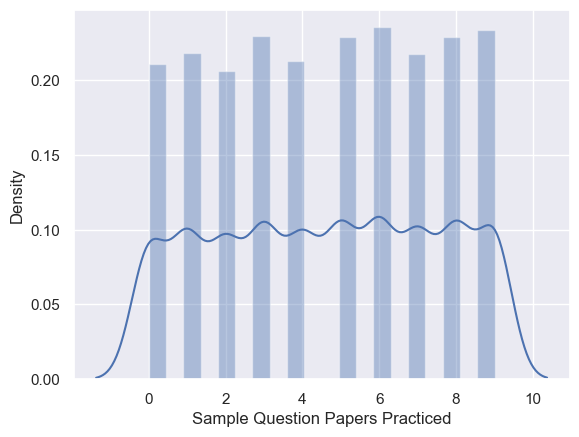

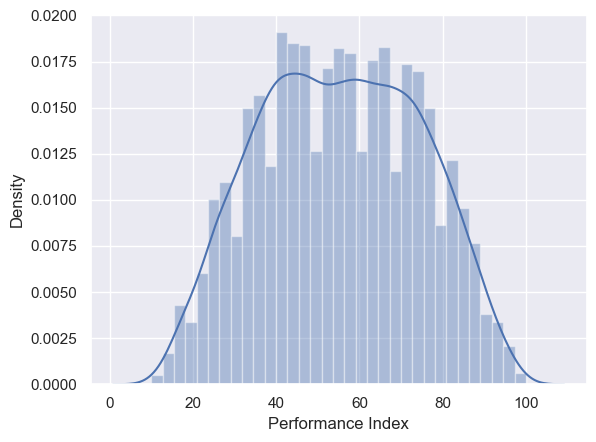

In [16]:
def distplots(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    distplots(i)

In [17]:
# Feature Scaling - split the data into indepednet and dependent varialbe
x = dataset.iloc[:,0:-1] # Independent variable
y = dataset.iloc[:,-1] # Dependent variable

In [18]:
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [19]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444
...,...,...,...,...,...
9868,-1.541976,-1.179880,1.010078,-1.491315,-0.900925
9869,0.775566,-0.314066,1.010078,0.864957,0.145444
9870,0.389309,0.782633,1.010078,0.864957,0.145444
9871,1.548079,1.590727,1.010078,0.275889,-1.598505


In [21]:
pd.DataFrame(sc_x).describe()

,0,1,2,3,4
count,9.873000e+03,9.873000e+03,9.873000e+03,9.873000e+03,9.873000e+03
mean,-8.672177e-17,-8.348319e-17,-1.381791e-16,2.382150e-16,-1.201870e-16
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.541976e+00,-1.699369e+00,-9.900224e-01,-1.491315e+00,-1.598505e+00
25%,-7.694624e-01,-8.912755e-01,-9.900224e-01,-9.022472e-01,-9.009252e-01
50%,3.051559e-03,-2.546084e-02,-9.900224e-01,2.758888e-01,1.454439e-01
75%,7.755655e-01,8.980748e-01,1.010078e+00,8.649568e-01,8.430232e-01
max,1.548079e+00,1.706168e+00,1.010078e+00,1.454025e+00,1.540603e+00


In [22]:
# checking "Multicollinearity" since it's multiple linear regression.
variable = sc_x
variable.shape

(9873, 5)

#### To check Multicollinearity - VIF (Variance Inflation Factor)

In [23]:
# VIF value is more than 5 means there is a multicollinearity there in the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [24]:
vif

,variance_inflation_factor,Features
0,1.000393,Hours Studied
1,1.000350,Previous Scores
2,1.000888,Extracurricular Activities
3,1.000676,Sleep Hours
4,1.000540,Sample Question Papers Practiced


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [27]:
print(x_train.shape)
print(x_test.shape)

(7898, 5)
(1975, 5)


In [28]:
print(y_train.shape)
print(y_test.shape)

(7898,)
(1975,)


In [29]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6244,7,79,1,9,9
334,5,44,0,6,0
9900,5,53,1,7,7
3055,3,88,0,5,3
6555,6,73,1,7,1
...,...,...,...,...,...
6129,3,40,1,5,4
9484,7,65,0,6,7
3453,1,69,0,4,8
1961,8,41,1,5,5


### Building Model - Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [31]:
print(lm.coef_)

[2.85807139 1.01779793 0.62057095 0.47811677 0.19466511]


In [32]:
print(lm.intercept_)

-34.03759919742531


In [33]:
x.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [34]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6244,7,79,1,9,9
334,5,44,0,6,0
9900,5,53,1,7,7
3055,3,88,0,5,3
6555,6,73,1,7,1
...,...,...,...,...,...
6129,3,40,1,5,4
9484,7,65,0,6,7
3453,1,69,0,4,8
1961,8,41,1,5,5


### Predict test dataset with linear model

In [35]:
y_pred = lm.predict(x_test)
print(y_pred)

[73.05054486 27.90456729 39.52609214 ... 42.51831731 34.5411674
 70.50845371]


In [36]:
y_test

6244    74.0
334     30.0
9900    40.0
3055    68.0
6555    63.0
        ... 
6129    19.0
9484    53.0
3453    43.0
1961    33.0
9025    67.0
Name: Performance Index, Length: 1975, dtype: float64

### Evaluation

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print("Accuracy :", r2_score(y_test, y_pred))

Accuracy : 0.9878120360079914


In [38]:
mae= mean_absolute_error(y_test, y_pred)
print(mae)

1.6911921606195806


In [39]:
mape= mean_absolute_percentage_error(y_test, y_pred)
print(mape)

0.03595106470817499


## Using the OLS method

In [40]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [41]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [42]:
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()

In [43]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          3.808e+04
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        14:33:16   Log-Likelihood:                         -6316.3
No. Observations:                1975   AIC:                                  1.264e+04
Df Residuals:                    1970   BIC:                                  1.267e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours Studied                        2.1477      0.049     44.039      0.000       2.052       2.243
Previous Scores                      0.8172      0.006    136.830      0.000       0.805       0.829
Extracurricular Activities          -1.1133      0.264     -4.210      0.000      -1.632      -0.595
Sleep Hours                         -1.4524      0.063    -23.209      0.000      -1.575      -1.330
Sample Question Papers Practiced    -0.2915      0.045     -6.449      0.000      -0.380      -0.203
==============================================================================
Omnibus:                        8.592   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                6.642
Skew:                           0.020   Prob(JB):                       0.0361
Kurtosis:                       2.719   Cond. No.                         143.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [45]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.578e+05
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        14:39:18   Log-Likelihood:                         -25113.
No. Observations:                7898   AIC:                                  5.024e+04
Df Residuals:                    7893   BIC:                                  5.027e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours Studied                        2.2090      0.024     91.737      0.000       2.162       2.256
Previous Scores                      0.8167      0.003    281.114      0.000       0.811       0.822
Extracurricular Activities          -1.1753      0.129     -9.096      0.000      -1.429      -0.922
Sleep Hours                         -1.5118      0.030    -49.771      0.000      -1.571      -1.452
Sample Question Papers Practiced    -0.2597      0.022    -11.708      0.000      -0.303      -0.216
==============================================================================
Omnibus:                       37.617   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.600
Skew:                          -0.005   Prob(JB):                     1.02e-06
Kurtosis:                       2.711   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

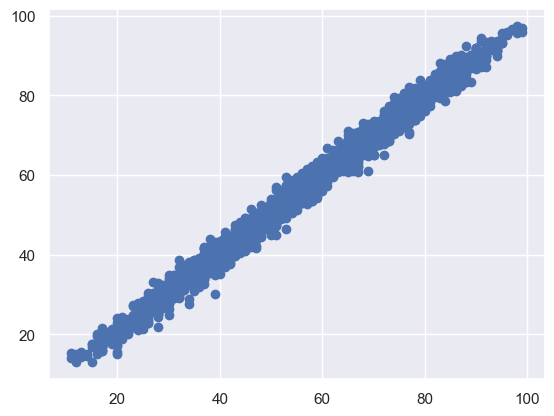

In [46]:
plt.scatter(y_test, y_pred)
plt.show()

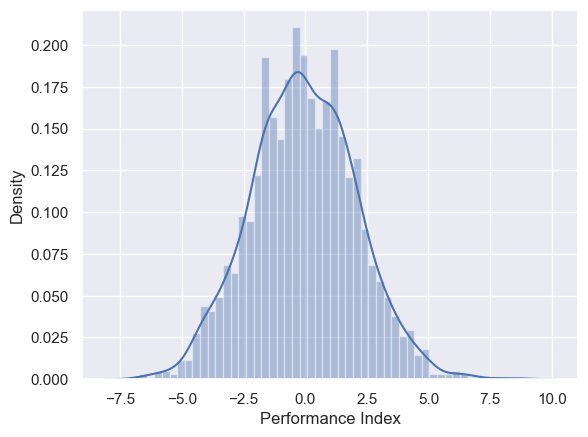

In [47]:
sns.distplot((y_test - y_pred), bins=50)
plt.show()

### Regularisation Method

In [50]:
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(x_train, y_train)
print("lm model", lm.coef_)

lm model [2.85807139 1.01779793 0.62057095 0.47811677 0.19466511]


In [51]:
y_pred_lm_train = lm.predict(x_train)
y_pred_lm_test = lm.predict(x_test)

In [52]:
print("LM_Train_ACCURACY :", r2_score(y_train, y_pred_lm_train))
print()
print("LM_Test_ACCURACY :", r2_score(y_test, y_pred_lm_test))

LM_Train_ACCURACY : 0.9888967225498639

LM_Test_ACCURACY : 0.9878120360079914


## Lasso method (L1)

In [60]:
# Lasso method - exact zero or closed to zero (slope/coefficient)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(x_train, y_train)
print("Lasso Regularisation", lasso.coef_)

Lasso Regularisation [2.81526489 1.01697199 0.         0.36960318 0.15964043]


In [61]:
y_pred_lasso_train = lasso.predict(x_train)
y_pred_lasso_test = lasso.predict(x_test)

In [62]:
print("Lasso_Train_ACCURACY :", r2_score(y_train, y_pred_lasso_train))
print()
print("Lasso_Test_ACCURACY :", r2_score(y_test, y_pred_lasso_test))

Lasso_Train_ACCURACY : 0.9884863216492178

Lasso_Test_ACCURACY : 0.9874370304228809


### Ridge Regularization (L2)

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", ridge.coef_)

Ridge Model : [2.85805535 1.0177978  0.62047692 0.47810979 0.1946646 ]


In [64]:
y_pred_ridge_train = ridge.predict(x_train)
y_pred_ridge_test = ridge.predict(x_test)

In [65]:
print("Ridge_Train_ACCURACY :", r2_score(y_train, y_pred_ridge_train))
print()
print("Ridge_Test_ACCURACY :", r2_score(y_test, y_pred_ridge_test))

Ridge_Train_ACCURACY : 0.9888967225387757

Ridge_Test_ACCURACY : 0.9878120526807271


### ElasticNet Regularization (L1 + L2)

In [66]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.3, l1_ratio=0.1)
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [67]:
print("ElasticNet Model :", elasticnet.coef_)

ElasticNet Model : [2.74376579 1.01672792 0.24143725 0.42512968 0.18761367]


In [68]:
y_pred_elasticNet_train = elasticnet.predict(x_train)
y_pred_elasticNet_test = elasticnet.predict(x_test)

In [69]:
print("ElasticNet_Train_ACCURACY :", r2_score(y_train, y_pred_elasticNet_train))
print()
print("ElasticNet_Test_ACCURACY :", r2_score(y_test, y_pred_elasticNet_test))

ElasticNet_Train_ACCURACY : 0.9885369885439956

ElasticNet_Test_ACCURACY : 0.9875655539539913


## Gradient Descent

In [70]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(sc_x,y,test_size=0.2, random_state=0)

In [71]:
from sklearn.linear_model import SGDRegressor
gdmodel = SGDRegressor()
gdmodel.fit(x_train1, y_train1)

SGDRegressor()

In [72]:
y_pred_sgd_train = gdmodel.predict(x_train1)
y_pred_sgd_test = gdmodel.predict(x_test1)

In [73]:
y_test

6244    74.0
334     30.0
9900    40.0
3055    68.0
6555    63.0
        ... 
6129    19.0
9484    53.0
3453    43.0
1961    33.0
9025    67.0
Name: Performance Index, Length: 1975, dtype: float64

In [75]:
print(y_pred_sgd_test)

[72.9475822  27.81140631 39.42517154 ... 42.50199303 34.49515402
 70.54012115]


In [76]:
print("GD Model Training Accuracy :", r2_score(y_train, y_pred_sgd_train))
print()
print("GD Model Test Accuracy :", r2_score(y_test, y_pred_sgd_test))

GD Model Training Accuracy : 0.9888760949958205

GD Model Test Accuracy : 0.987809036929611


## TO Ensure that our model is absolutely fine we will carryout
## Cross Validation Score - K-Fold method

In [77]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lm, x_train, y_train, cv=10)

In [78]:
print('training_accuracy for all 10 individual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 individual : [0.98945562 0.98891322 0.98861269 0.98785487 0.98999143 0.98949854
 0.98760861 0.98857868 0.98954505 0.98851622]

training_accuracy with mean value : 0.9888574924996106

training_accuracy max value : 0.9899914296093275


## Performance matrix

In [79]:
## Mean Absolute Error - MAE
from sklearn import metrics

In [80]:
print("MAE :",metrics.mean_absolute_error(y_test, y_pred_lm_test))

MAE : 1.6911921606195806


In [81]:
# Mean Absolute Percent Error
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred_lm_test)/y_test*100)

MAPE : 6244    2.285395
334     5.637307
9900    4.227980
3055    2.487047
6555    2.684432
          ...   
6129    8.901011
9484    3.190929
3453    3.933005
1961    5.124825
9025    2.524167
Name: Performance Index, Length: 1975, dtype: float64


In [82]:
# Mean Squared Error 
print("MSE :", metrics.mean_squared_error(y_test, y_pred_lm_test))

MSE : 4.490041091497724


In [83]:
# Root Mean Squared Error
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm_test)))

RMSE : 2.1189717061579003
